In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels import regression

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV

from category_encoders import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [2]:
solved_mapdf_sex = pd.read_csv('pred_mapdf.csv')

In [3]:
solved_mapdf_sex.columns

Index(['Unnamed: 0', 'id', 'cntyfips', 'ori', 'state', 'agency', 'agentype',
       'source', 'solved', 'year', 'month', 'incident', 'actiontype',
       'homicide', 'situation', 'vicage', 'vicsex', 'vicrace', 'vicethnic',
       'offage', 'offsex', 'offrace', 'offethnic', 'weapon', 'relationship',
       'circumstance', 'viccount', 'offcount', 'msa', 'year_str', 'monthyear',
       'datetime', 'offrace_cat', 'offsex_cat', 'preds', 'offsex_pred'],
      dtype='object')

In [5]:
solved_mapdf_sex.drop(columns = 'Unnamed: 0', inplace=True)

In [22]:
X = solved_mapdf_sex.drop(columns = ['id', 'cntyfips', 'ori', 'agency', 'agentype', 'source',
     'solved','incident', 'actiontype', 'offage', 
       'offsex', 'offrace', 'offethnic',
       'circumstance', 'viccount', 'offcount', 'msa', 'year_str', 'monthyear',
       'datetime', 'offrace_cat', 'offsex_cat', 'preds', 'offsex_pred'])
y = solved_mapdf_sex['offsex_pred']

In [23]:
X.columns

Index(['state', 'year', 'month', 'homicide', 'situation', 'vicage', 'vicsex',
       'vicrace', 'vicethnic', 'weapon', 'relationship'],
      dtype='object')

In [24]:
ohe = OneHotEncoder(cols = ['state', 'weapon', 'vicsex', 'vicrace', 'vicethnic', 'relationship', 'homicide', 'situation', 'month'], use_cat_names = True)

In [25]:
ohe.fit(X)

OneHotEncoder(cols=['state', 'weapon', 'vicsex', 'vicrace', 'vicethnic',
                    'relationship', 'homicide', 'situation', 'month'],
              use_cat_names=True)

In [29]:
X = ohe.transform(X)

In [30]:
X.head()

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_District of Columbia,state_Florida,...,relationship_Stepfather,relationship_Ex-husband,relationship_Other family,relationship_Girlfriend,relationship_Employee,relationship_Stepmother,relationship_Sister,relationship_Stepdaughter,relationship_Employer,relationship_Homosexual relationship
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [32]:
ss_log_preds = StandardScaler()
X_train_preds = ss_log_preds.fit_transform(X_train)
X_test_preds = ss_log_preds.transform(X_test)

In [34]:
sex_logReg_preds = LogisticRegression(C = 1)
sex_logReg_preds.fit(X_train_preds, y_train)
y_pred_sex_preds = sex_logReg_preds.predict(X_test_preds)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


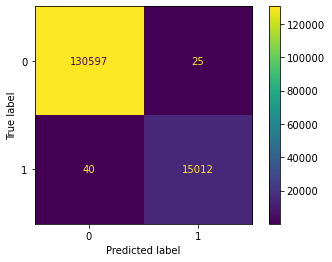

In [35]:
cm_norm = confusion_matrix(y_test, y_pred_sex_preds)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_norm, display_labels = sex_logReg_preds.classes_)
disp.plot();

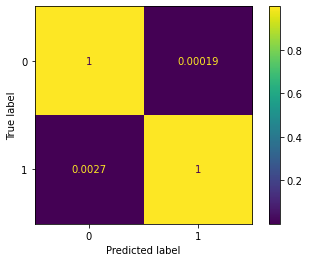

In [38]:
cm_norm = confusion_matrix(y_test, y_pred_sex_preds, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix = cm_norm, display_labels = sex_logReg_preds.classes_)
disp.plot();

In [37]:
print(classification_report(y_test, y_pred_sex_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    130622
           1       1.00      1.00      1.00     15052

    accuracy                           1.00    145674
   macro avg       1.00      1.00      1.00    145674
weighted avg       1.00      1.00      1.00    145674

